# Feature Scaling

Scikit-learn provides the following scaling classes:

* **StandardScaler(X)**: Scales the data so that the mean is 0 and the standard deviation is 1.
* **MinMaxScaler(X)**: Scales the data so that the maximum value is 1 and the minimum value is 0.


Standardization vs Normalization

In data preprocessing, **Standardization** and **Normalization** are two common techniques used to scale features. Here's the difference between them:

| **Technique**     | **Description**                                                                                             | **Formula**                                                    | **When to Use**                                       |
|-------------------|-------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------|------------------------------------------------------|
| **Standardization** | Transforms the data to have a mean of 0 and a standard deviation of 1. This is useful when the data follows a Gaussian distribution. | $ \frac{x - \mu}{\sigma} $ (where $ \mu $ is the mean and $ \sigma $ is the standard deviation) | Use when the algorithm assumes the data is normally distributed (e.g., Linear Regression, SVM, Logistic Regression). |
| **Normalization**   | Scales the data to a fixed range, typically [0, 1]. It is useful when the data does not follow a Gaussian distribution. | $ \frac{x - \min(x)}{\max(x) - \min(x)} $ (scales data to the range [0, 1]) | Use when the data needs to be scaled to a specific range (e.g., Neural Networks, KNN). |


Key Differences

- **Standardization**: Centers the data by subtracting the mean, then scales it by dividing by the standard deviation. It does not bound values to a specific range.
- **Normalization**: Rescales the data to fit within a specified range, such as [0, 1], which is helpful when features have different scales.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Hands On!

## Using formula to implement scaler

In [173]:
import numpy as np

# Sample data
ex = np.array([0, 1, 2, 3, 4, 5])

# Standardization
standardized_data = (ex - ex.mean()) / ex.std()
print("Standardization:", standardized_data)

# Normalization
normalized_data = (ex - ex.min()) / (ex.max() - ex.min())
print("Normalization:", normalized_data)

Standardization: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
Normalization: [0.  0.2 0.4 0.6 0.8 1. ]


## Using Scikit-learn Scaler

The usage of `StandardScaler` or `MinMaxScaler` is as follows:

* (1) **`fit`**: Estimates the distribution of the training data. When the `fit` method is executed on the training data, it stores the distribution parameters (mean and standard deviation) inside the object.
* (2) **`transform`**: Transforms the training data. When the `transform` method is executed on the training data, it scales the data based on the parameters learned during `fit`.
* (3) **`fit_transform`**: Combines steps (1) and (2) into one method. The `fit_transform` method fits the model on the training data and then transforms the data in one step.

For preprocessing:
- Apply the **`fit_transform()`** method on the training data.
- Apply the **`transform()`** method on the test data.

**Important Note**:  
If the training and test data are scaled differently, the trained model may misinterpret the test data, leading to inaccurate performance evaluation. Therefore, both the training and test data should be preprocessed using the same scaling ratio.


In [174]:
# given random data
X_train = np.array([0, 1, 2, 3, 4, 5])
X_test = np.array([0, 10, 20, 30, 40, 50])

In [175]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = scaler1.transform(X_test.reshape(-1, 1))

print(X_train_scaled)  # average to be 0, stdev to be 1.
print("-" * 30)
print(X_test_scaled)

[[-1.46385011]
 [-0.87831007]
 [-0.29277002]
 [ 0.29277002]
 [ 0.87831007]
 [ 1.46385011]]
------------------------------
[[-1.46385011]
 [ 4.39155033]
 [10.24695077]
 [16.1023512 ]
 [21.95775164]
 [27.81315208]]


In [176]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
X_train_scaled = scaler2.fit_transform(X_train.reshape(-1, 1))
X_test_scaled = scaler2.transform(X_test.reshape(-1, 1))

print(X_train_scaled)  # starting from 0 to 1
print("-" * 30)
print(X_test_scaled)

[[0. ]
 [0.2]
 [0.4]
 [0.6]
 [0.8]
 [1. ]]
------------------------------
[[ 0.]
 [ 2.]
 [ 4.]
 [ 6.]
 [ 8.]
 [10.]]


### 1. Why use `transform` instead of `fit_transform` for test X?

`MinMaxScaler` sets the **scaling criteria (minimum and maximum)** based on the training data (`X_train`). This scaling criteria must be reused for the test data to ensure consistency. Therefore, we only use `transform` on the test data without performing `fit` again.

#### Reason:
- **`fit`**: Calculates the minimum (`min`) and maximum (`max`) values of the data and stores them as the internal state (scaling criteria).
- **`transform`**: Applies the previously calculated criteria to transform the data.
- If `fit` is called again on the test data, it recalculates the `min` and `max` values, leading to different scaling criteria. This would break the consistency required for evaluation and prediction.

#### Summary:
- **`fit_transform`**: Used on the training data. Sets the criteria and transforms the data.
- **`transform`**: Used on the test data. Reuses the criteria established by the training data.

---

### 2. Why is the test data not scaled within the [0, 1] range?

The `MinMaxScaler` scales the data based on the **minimum and maximum values of the training data**.  
If the test data contains values that exceed the training data's range, the transformed values for the test data can fall outside the [0, 1] range.

#### Example:
- **Training Data (`X_train`)**: `[1, 2, 3, 4, 5]`
  - Minimum (`min`): 1
  - Maximum (`max`): 5
  - Scaling formula:  
    $ [
    X_{\text{scaled}} = \frac{X - \text{min}}{\text{max} - \text{min}}
    $ ]

- **Test Data (`X_test`)**: `[0, 6, 10]`
  - The test data values will be scaled using the training data's `min` and `max`:
    - $ \frac{0 - 1}{5 - 1} = -0.25 $ (value falls below 0)
    - $ \frac{6 - 1}{5 - 1} = 1.25 $ (value exceeds 1)
    - $ \frac{10 - 1}{5 - 1} = 2.25 $ (value exceeds 1)


This is expected behavior and indicates that the test data contains values outside the training data's range.


# Effect of Scaling

Adjusting the scale of the data can improve the learning process, leading to better model accuracy compared to when scaling is not applied.


## BrestCancerExample

In [177]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target
)

사이킷런에서 제공하는 유방암 데이터셋에는 스케일이 매우 다른 특성변수가 있다.

In [178]:
cancer.feature_names[[2, 3]]

array(['mean perimeter', 'mean area'], dtype='<U23')

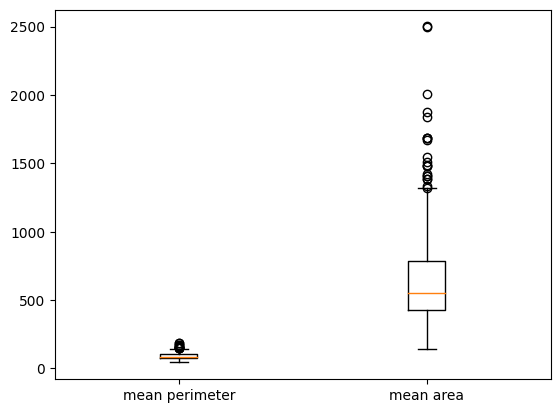

In [179]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.boxplot(X_train[:, [2, 3]])
plt.xticks([1, 2], cancer.feature_names[[2, 3]])
plt.show()

### when data NOT scaled

In [180]:
from sklearn.svm import SVC

# you do not need to know everything about SVC here, just consider we are just calculating score

svc = SVC(gamma="auto")
svc.fit(X_train, y_train)
print("test accuracy: %.3f" % (svc.score(X_test, y_test)))

test accuracy: 0.629


### when data scaling DONE

In [181]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

svc.fit(X_train_scale, y_train)

print("test accuracy: %.3f" % (svc.score(X_test_scale, y_test)))

test accuracy: 0.951


## DIABETES EXAMPLES

### **Scaling Data with Diabetes Dataset**

**Problem Description**

In this exercise, we will use the diabetes dataset from scikit-learn to demonstrate the impact of scaling on model performance. Scaling data is crucial for many machine learning algorithms, especially those that rely on distance metrics (like k-NN, SVMs, etc.) or gradient-based optimization methods (like linear regression). 

We will compare the performance of a linear regression model with and without scaling, using **StandardScaler** and **MinMaxScaler** as scaling methods.

**Exercise Steps**

1. **Without Scaling**: Train the linear regression model without applying any scaling to the data.
2. **With StandardScaler**: Apply `StandardScaler` to scale the features and then train the linear regression model.
3. **With MinMaxScaler**: Apply `MinMaxScaler` to scale the features and then train the linear regression model.

We will evaluate each case using Mean Squared Error (MSE) on the test dataset and compare the performance.

**Questions**

1. **Compare the MSE** of the model without scaling and with scaling. Why does scaling affect the model's performance? 
2. **Compare the MSE** results between `StandardScaler` and `MinMaxScaler`. Which method seems to work better, and why do you think so?
3. **Analyze the effect of scaling** on model learning. How does it impact convergence and accuracy in linear regression? How might different models behave with scaling?

**Expected Results**

- **Without Scaling**: The MSE value is likely to be higher, as the model will struggle to properly learn from data with different feature scales.
- **With Scaling**: After applying scaling, the model should perform better with lower MSE because the features will have a similar range and variance, which helps the model converge faster.
- **Comparison of Scaling Methods**: `StandardScaler` and `MinMaxScaler` use different approaches to scaling. `StandardScaler` standardizes the data based on mean and standard deviation, while `MinMaxScaler` transforms the data into a [0, 1] range. Depending on the data distribution, one method might perform better than the other.

**Learning Points**
- **Scaling** ensures that all features are treated equally by the model, avoiding bias towards features with larger magnitudes.
- **StandardScaler** standardizes data based on the mean and standard deviation, making it useful when the features are normally distributed.
- **MinMaxScaler** is more sensitive to outliers, but is often used when features are expected to fall within a fixed range (like [0, 1]).
- **Model Impact**: Scaling can improve the model’s performance, especially for models that use distance metrics or gradient-based optimization techniques.
